In [ ]:
pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)

# data (as pandas dataframes)
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets

# variable information
print(real_estate_valuation.variables)


                                     name     role        type demographic  \
0                                      No       ID     Integer        None   
1                     X1 transaction date  Feature  Continuous        None   
2                            X2 house age  Feature  Continuous        None   
3  X3 distance to the nearest MRT station  Feature  Continuous        None   
4         X4 number of convenience stores  Feature     Integer        None   
5                             X5 latitude  Feature  Continuous        None   
6                            X6 longitude  Feature  Continuous        None   
7              Y house price of unit area   Target  Continuous        None   

                                         description  \
0                                               None   
1  for example, 2013.250=2013 March, 2013.500=201...   
2                                               None   
3                                               None   
4  number of conv

In [ ]:
rename_map = {
    'X1 transaction date': 'transaction_date',
    'X2 house age': 'house_age',
    'X3 distance to the nearest MRT station': 'distance_to_nearest_MRT_station',
    'X4 number of convenience stores': 'n_convience_stores',
    'X5 latitude': 'latitude',
    'X6 longitude': 'longitude',
    'Y house price of unit area': 'price_of_unit_area'
}

df = pd.concat([X, y], axis=1).rename(columns=rename_map)
df.head()

,transaction_date,house_age,distance_to_nearest_MRT_station,n_convience_stores,latitude,longitude,price_of_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
# check for duplicate
print(df.duplicated().sum())

0


In [ ]:
# Check for null
print(df.isnull().sum())

transaction_date                   0
house_age                          0
distance_to_nearest_MRT_station    0
n_convience_stores                 0
latitude                           0
longitude                          0
price_of_unit_area                 0
dtype: int64


In [ ]:
# dtype check
print(df.dtypes)

transaction_date                   float64
house_age                          float64
distance_to_nearest_MRT_station    float64
n_convience_stores                   int64
latitude                           float64
longitude                          float64
price_of_unit_area                 float64
dtype: object


In [ ]:
# identification of categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_columns)

[]


In [ ]:
display(df.describe())

,transaction_date,house_age,distance_to_nearest_MRT_station,n_convience_stores,latitude,longitude,price_of_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


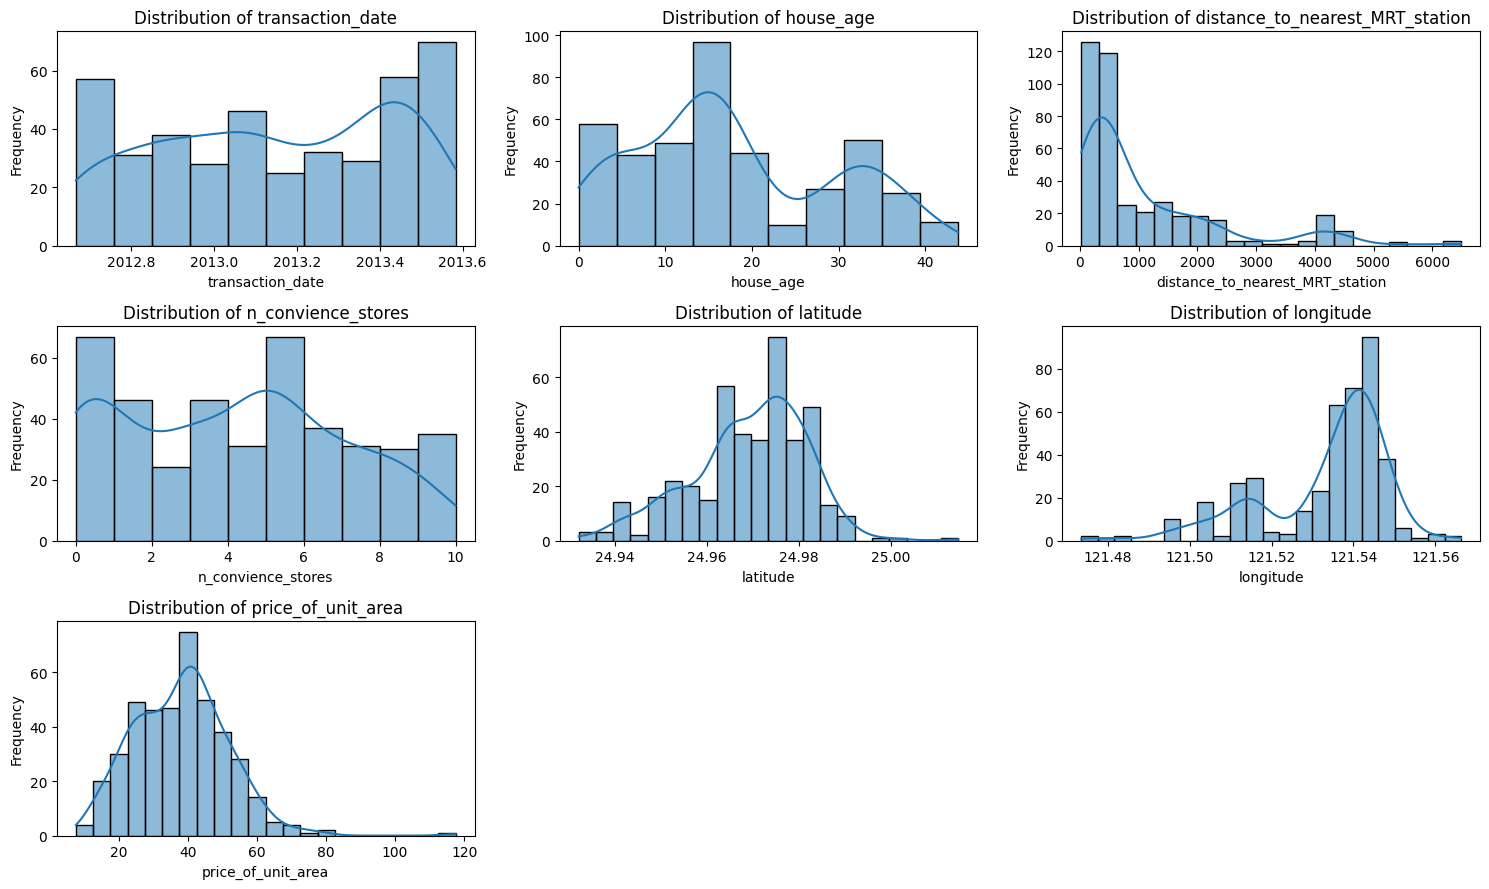

In [ ]:
# Plot histograms for numerical features
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
# subplots
n_cols = 3
n_rows = 3

plt.figure(figsize=(15, n_rows * 3))
for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# standardize and normaliza the attributes
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_features = df.select_dtypes(include=np.number).columns.tolist()
# remove y
if 'price_of_unit_area' in numerical_features:
    numerical_features.remove('price_of_unit_area')

# Create copies of the DataFrame for standardization and normalization
df_standardized = df.copy()
df_normalized = df.copy()

# Standardize the numerical features
scaler_standard = StandardScaler()
df_standardized[numerical_features] = scaler_standard.fit_transform(df_standardized[numerical_features])

# Normalize the numerical features
scaler_minmax = MinMaxScaler()
df_normalized[numerical_features] = scaler_minmax.fit_transform(df_normalized[numerical_features])

print("DataFrame after Standardization:")
display(df_standardized.head())

print("\nDataFrame after Normalization:")
display(df_normalized.head())

DataFrame after Standardization:


,transaction_date,house_age,distance_to_nearest_MRT_station,n_convience_stores,latitude,longitude,price_of_unit_area
0,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762,37.9
1,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139,42.2
2,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183,47.3
3,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183,54.8
4,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937,43.1



DataFrame after Normalization:


,transaction_date,house_age,distance_to_nearest_MRT_station,n_convience_stores,latitude,longitude,price_of_unit_area
0,0.272926,0.730594,0.009513,1.0,0.616941,0.719323,37.9
1,0.272926,0.445205,0.043809,0.9,0.584949,0.711451,42.2
2,1.000000,0.303653,0.083315,0.5,0.671231,0.758896,47.3
3,0.909389,0.303653,0.083315,0.5,0.671231,0.758896,54.8
4,0.181223,0.114155,0.056799,0.5,0.573194,0.743153,43.1


In [ ]:
# correlation matrix
correlation_matrix = df.corr()
display(correlation_matrix)

,transaction_date,house_age,distance_to_nearest_MRT_station,n_convience_stores,latitude,longitude,price_of_unit_area
transaction_date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
house_age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance_to_nearest_MRT_station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
n_convience_stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
price_of_unit_area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


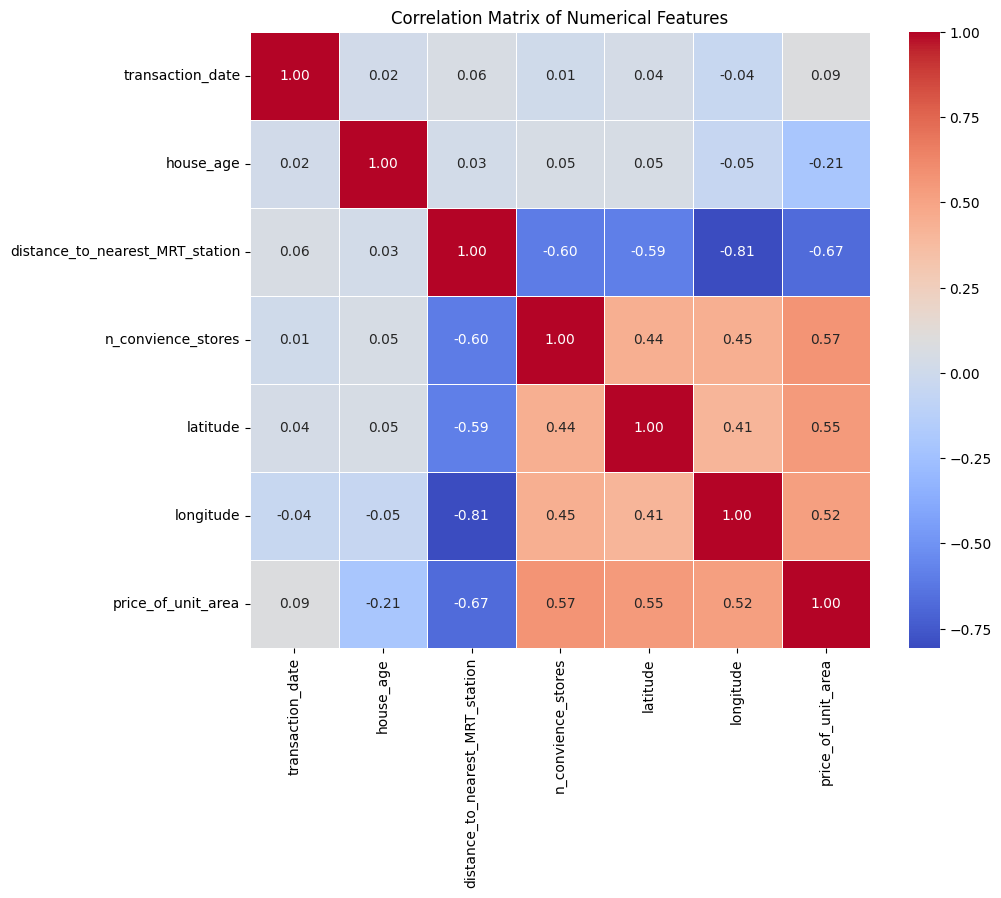

In [ ]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Let's double check multi-collinearity
X_vif = df_standardized[numerical_features].copy()

# Add constant for intercept
X_vif = sm.add_constant(X_vif)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]

# Drop the constant row (not useful for interpretation)
vif_data = vif_data[vif_data["feature"] != "const"]

print(vif_data)



                           feature       VIF
1                 transaction_date  1.014674
2                        house_age  1.014287
3  distance_to_nearest_MRT_station  4.323019
4               n_convience_stores  1.617038
5                         latitude  1.610234
6                        longitude  2.926302


In [ ]:
# Drop weakly correlated features
features_to_drop = ['transaction_date', 'house_age']

df_selected = df_standardized.drop(features_to_drop, axis=1)

df_selected.head()

,distance_to_nearest_MRT_station,n_convience_stores,latitude,longitude,price_of_unit_area
0,-0.792495,2.007407,1.125430,0.448762,37.9
1,-0.616612,1.667503,0.912444,0.401139,42.2
2,-0.414015,0.307885,1.486860,0.688183,47.3
3,-0.414015,0.307885,1.486860,0.688183,54.8
4,-0.549997,0.307885,0.834188,0.592937,43.1


In [ ]:
from sklearn.model_selection import train_test_split

# use the standardized data for splitting
X_selected = df_selected.drop('price_of_unit_area', axis=1)
y = df_selected['price_of_unit_area']

# Split the standardized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (331, 4)
Shape of X_test: (83, 4)
Shape of y_train: (331,)
Shape of y_test: (83,)


Model Construction: SGDRegressor

In [94]:
# SGD Regressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

param_grid = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'eta0': [0.01, 0.05, 0.1],
    'max_iter': [1000, 2000, 3000, 5000]
}

sgd = SGDRegressor(random_state=42, tol = 1e-2)
grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_sgdmodel = grid_search.best_estimator_

# Predict on the test set
y_train_pred = best_sgdmodel.predict(X_train)
y_test_pred = best_sgdmodel.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Create a dictionary to organize the results
performance_summary = {
    'Metric': ['R-squared (R²)', 'Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)'],
    'Training Set': [train_r2, train_mse, train_mae],
    'Test Set': [test_r2, test_mse, test_mae]
}

# Create a pandas DataFrame from the dictionary
summary_df = pd.DataFrame(performance_summary)

# Set the 'Metric' column as the index for better readability
summary_df.set_index('Metric', inplace=True)

# Print the summary table
print("--- SGD Regressor Performance Summary ---")
display(summary_df.round(4))



Best Hyperparameters: {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'optimal', 'loss': 'squared_error', 'max_iter': 1000, 'penalty': 'l1'}
--- SGD Regressor Performance Summary ---


,Training Set,Test Set
Metric,,
R-squared (R²),0.4870,0.5951
Mean Squared Error (MSE),96.4868,67.9336
Mean Absolute Error (MAE),7.2292,6.5427


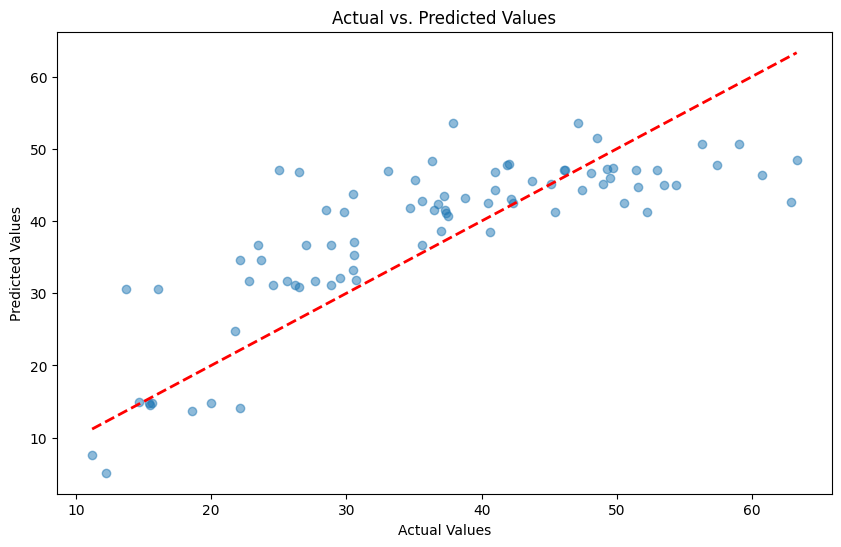

In [95]:
# Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


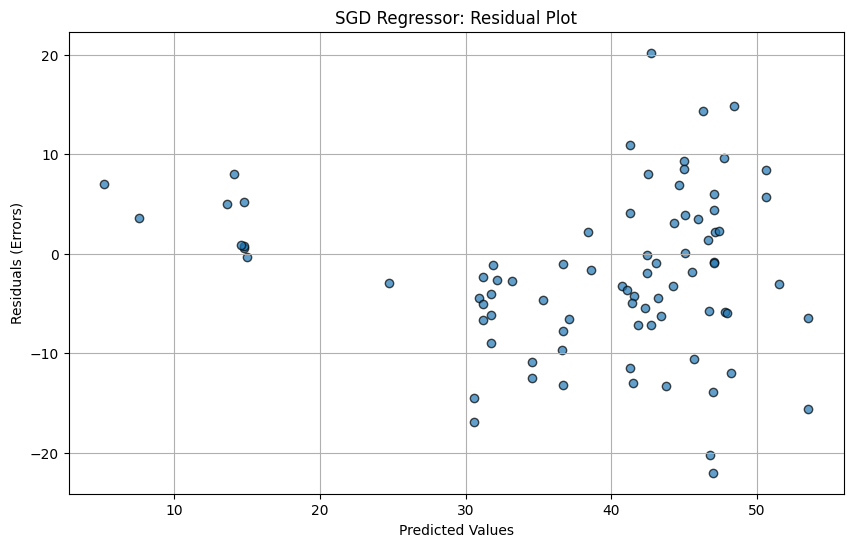

In [98]:
# Calculate the residuals for the SGD model
sgd_residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, sgd_residuals, alpha=0.7, edgecolors='k')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Errors)')
plt.title('SGD Regressor: Residual Plot')
plt.grid(True)
plt.show()

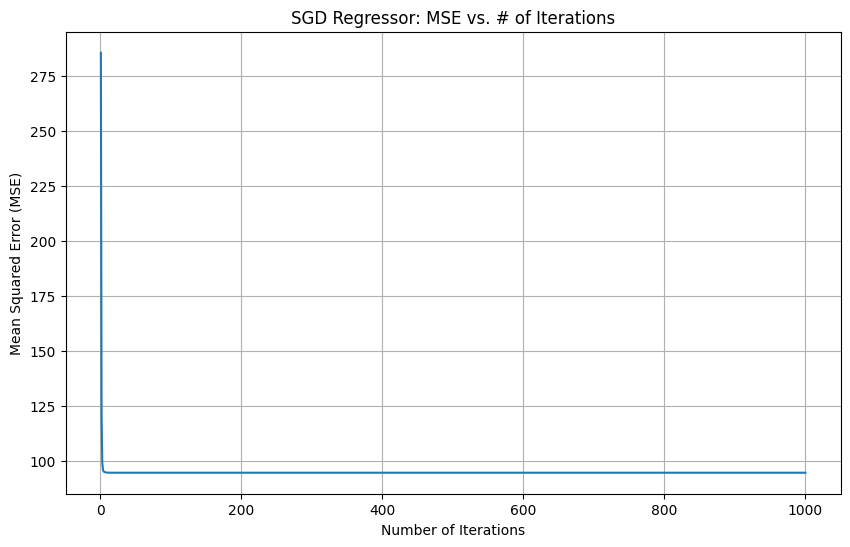

In [100]:
# MSE vs. # of iterations
from sklearn.metrics import mean_squared_error
sgd_plot = SGDRegressor(max_iter=1, tol=None, random_state=42, warm_start=True,
                              loss='squared_error', penalty='l1', alpha=0.01,
                              learning_rate='invscaling', eta0=0.01)

train_errors = []

for i in range(1, 1001):
    sgd_plot.fit(X_train, y_train)
    y_train_pred = sgd_plot.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_mse)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001), train_errors, linestyle='-')
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('SGD Regressor: MSE vs. Number of Iterations')
plt.grid(True)
plt.show()


In [ ]:

# Create a DataFrame from the grid search results
results_df = pd.DataFrame(grid_search.cv_results_)

# Select and rename the most important columns
log_df = results_df[[
    'param_loss',
    'param_penalty',
    'param_alpha',
    'param_learning_rate',
    'param_eta0',
    'param_max_iter',
    'mean_test_score'
]].copy()

# Convert the score to a positive error rate for better readability
log_df['mean_test_mse'] = -log_df['mean_test_score']

# Show the best results (lowest error) at the top
log_df = log_df.sort_values(by='mean_test_mse', ascending=True)

print("--- Hyperparameter Tuning Log ---")

# Display the top 15 results from the log
log_df.head(15)

--- Hyperparameter Tuning Log ---


,param_loss,param_penalty,param_alpha,param_learning_rate,param_eta0,param_max_iter,mean_test_score,mean_test_mse
795,squared_error,l1,0.01,optimal,0.05,2000,-97.489519,97.489519
798,squared_error,l1,0.01,optimal,0.05,3000,-97.489519,97.489519
792,squared_error,l1,0.01,optimal,0.05,1000,-97.489519,97.489519
900,squared_error,l1,0.01,optimal,0.10,1000,-97.489519,97.489519
693,squared_error,l1,0.01,optimal,0.01,5000,-97.489519,97.489519
903,squared_error,l1,0.01,optimal,0.10,2000,-97.489519,97.489519
690,squared_error,l1,0.01,optimal,0.01,3000,-97.489519,97.489519
801,squared_error,l1,0.01,optimal,0.05,5000,-97.489519,97.489519
684,squared_error,l1,0.01,optimal,0.01,1000,-97.489519,97.489519
687,squared_error,l1,0.01,optimal,0.01,2000,-97.489519,97.489519


Model Construction: OLS

In [ ]:
# Use the selected standardized dataset (already preprocessed)
X_ols = X_selected.copy()
y_ols = y.copy()

# Add a constant term for the intercept
X_ols = sm.add_constant(X_selected)

In [ ]:
# Check features
X_ols.head()

,const,distance_to_nearest_MRT_station,n_convience_stores,latitude,longitude
0,1.0,-0.792495,2.007407,1.125430,0.448762
1,1.0,-0.616612,1.667503,0.912444,0.401139
2,1.0,-0.414015,0.307885,1.486860,0.688183
3,1.0,-0.414015,0.307885,1.486860,0.688183
4,1.0,-0.549997,0.307885,0.834188,0.592937


In [ ]:
# Check target
y_ols

,price_of_unit_area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


In [ ]:
# Fit the model
ols_model = sm.OLS(y_ols, X_ols).fit()

In [ ]:
# Output model summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:     price_of_unit_area   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     111.3
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           4.24e-64
Time:                        01:38:46   Log-Likelihood:                -1515.3
No. Observations:                 414   AIC:                             3041.
Df Residuals:                     409   BIC:                             3061.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
# Refit the model after removing longitude
X_ols_2 = X_ols.drop("longitude", axis=1)

ols_model_2 = sm.OLS(y_ols, X_ols_2).fit()

In [ ]:
# Output model summary
print(ols_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:     price_of_unit_area   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     148.8
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           3.20e-65
Time:                        01:38:46   Log-Likelihood:                -1515.3
No. Observations:                 414   AIC:                             3039.
Df Residuals:                     410   BIC:                             3055.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Data Visualizations for the OLS Model

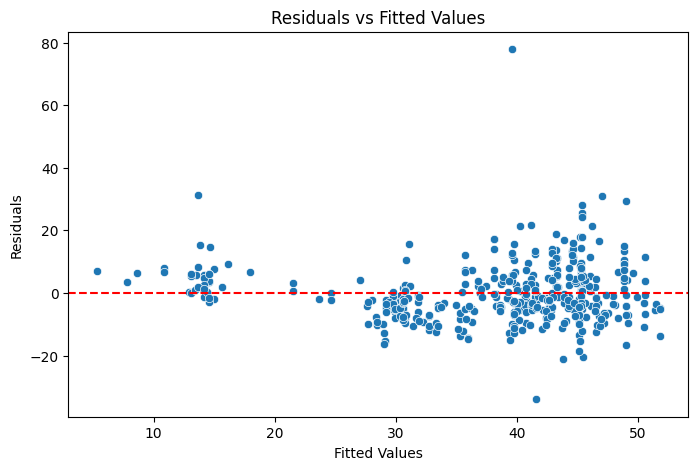

In [ ]:
fitted_vals = ols_model_2.fittedvalues
residuals = ols_model_2.resid

plt.figure(figsize=(8,5))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

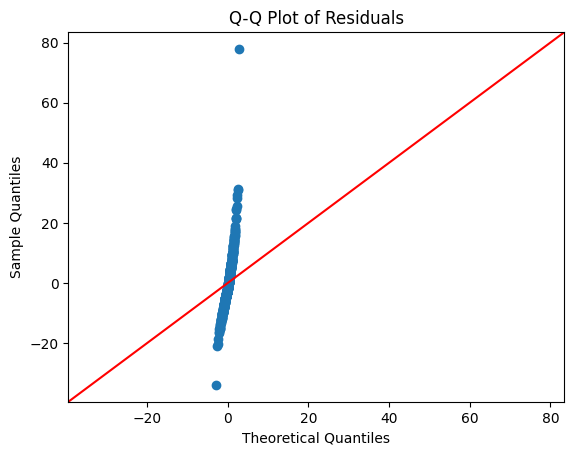

In [ ]:
# Q=Q Plots of Residuals
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

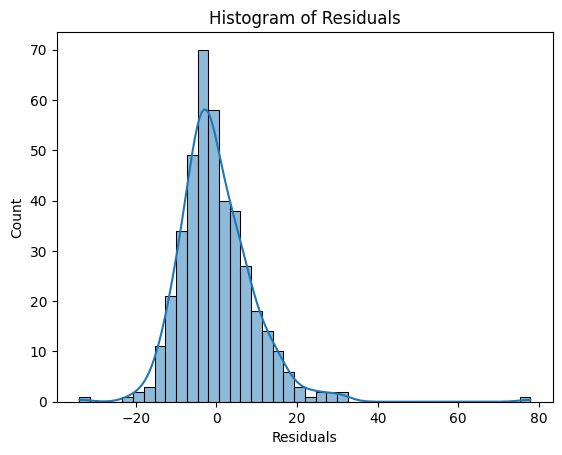

In [ ]:
# Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.show()